##Problem Statement

To show how LLMs generate next words. This notebook is created only to show this concpet in context of prompt engineering.

## Installing libraries for using word embeddings

In [84]:
# installing libraries to use word embeddings
!pip install gensim -q

In [85]:
# to read and manipulate the data
import pandas as pd
import numpy as np

pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Data Overview

##EDA

##Data Pre-Processing

##Word Embeddings with new training data

**List of words for training**

In [86]:
# Creating a list of all words in our data

words_list = [
    ['it', 'is', 'raining', 'I', 'need', 'umbrella'],
    ['it', 'is', 'raining', 'I', 'need', 'coat'],
    ['it', 'is', 'raining', 'I', 'need', 'car'],
    ['it', 'is', 'raining', 'I', 'need', 'coffee'],
    ['it', 'is', 'raining', 'I', 'need', 'shelter'],
    ['it', 'is', 'raining', 'I', 'need', 'sleep'],
    ['it', 'is', 'raining', 'I', 'need', 'romance'],
    ['it', 'is', 'raining', 'I', 'need', 'to', 'plant', 'crop'],
    ['Monkey', 'eats', 'banana'],
    ['King', 'minus', 'female', 'is', 'Queen'],
    ['banana', 'is', 'fruit'],
    ['raining', 'is', 'weather'],
    ['umbrella', 'is', 'equipment'],
    ['you', 'need', 'umbrella', 'when', 'raining']
   ]

####Pre-trained model Word2Vec

In [87]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [88]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 27


In [89]:
# Checking the word embedding of a random word
word = "raining"
model_W2V.wv[word]

array([-2.7503404e-03,  3.1037433e-03, -6.8602407e-05, -6.5293821e-04,
        1.5327565e-03, -1.3716780e-03,  9.1977633e-04,  2.3241274e-03,
        2.0186908e-03, -2.5121514e-03,  3.1331351e-03,  1.5581887e-03,
        1.3191187e-03, -2.0764191e-03,  2.8192841e-03, -7.2123925e-04,
        2.9481137e-03, -1.7881548e-03, -2.7082402e-03,  2.2738145e-03,
        5.5714097e-04, -7.3563296e-04,  3.1745636e-03,  3.1691303e-03,
       -3.2596707e-03,  8.3333452e-04,  2.0546783e-03,  1.2922181e-03,
        6.7313365e-04,  1.3946145e-04,  2.2786278e-04, -1.2756160e-03,
       -2.3820761e-03, -6.9967727e-04,  1.3072167e-03,  2.9450848e-03,
        3.0917733e-03, -1.9993810e-03, -3.1390651e-03,  3.2559368e-03,
        1.1435563e-03,  1.7191403e-03,  2.0976434e-03, -9.3581679e-04,
        2.4492873e-03,  9.4875955e-04,  9.5281960e-04, -7.9709647e-04,
       -1.0436294e-03, -7.9339783e-04,  1.4221894e-03,  2.6261003e-05,
       -3.2014318e-03, -3.2213528e-03, -2.0515281e-03, -4.1973261e-05,
      

In [90]:
# Checking the word embedding of a random word
word = "umbrella"
model_W2V.wv[word]

array([-2.39621429e-03,  1.41160062e-03,  7.19889707e-04,  2.48352229e-03,
       -1.63062790e-03, -1.52839918e-03, -2.02874700e-03,  1.10860541e-03,
       -1.50163728e-03,  2.83788983e-03, -1.42690225e-03, -3.03580426e-03,
       -1.60513527e-03,  2.14153365e-03, -2.12189090e-03, -1.75687147e-03,
       -2.43145041e-03,  2.00829888e-03,  1.11780223e-03,  9.50454618e-04,
       -1.04118488e-03,  2.00867956e-03, -2.04788567e-03, -6.58669742e-04,
       -1.99565361e-03, -3.33252043e-04, -6.75743504e-04,  2.83414428e-03,
        2.58346299e-05, -2.86307652e-03, -1.80726696e-03, -2.29514670e-03,
        8.99068837e-04,  3.14977881e-03, -1.93791348e-03,  2.75569363e-03,
        2.85162311e-03, -2.35561538e-03, -2.96364073e-03,  3.15833488e-03,
        2.78832507e-03, -1.56470959e-03, -2.23954697e-03,  2.61493050e-03,
        1.25520653e-03,  2.70049786e-03, -2.52594450e-03, -3.17367888e-03,
        5.28498553e-04, -3.26855946e-03, -1.63218449e-03, -1.15327328e-03,
        3.20298644e-03,  

### Distance between words

In [91]:
def calculate_distance(word1, word2):
  try:
    # Calculate the Euclidean distance assuming 'model_W2V' is your trained Word2Vec model
    vec1 = model_W2V.wv[word1]
    vec2 = model_W2V.wv[word2]
    distance = np.linalg.norm(vec1 - vec2)
    return distance
  except KeyError as e:
    print(f"Error: {e} not found in vocabulary.")

In [92]:
# Display distance between two words
print(f"The Euclidean distance between 'raining' and 'umbrella' is: {calculate_distance('raining', 'umbrella'):.4f}")
print(f"The Euclidean distance between 'raining' and 'shelter' is: {calculate_distance('raining', 'shelter'):.4f}")
print(f"The Euclidean distance between 'raining' and 'banana' is: {calculate_distance('raining', 'banana'):.4f}")


The Euclidean distance between 'raining' and 'umbrella' is: 0.0493
The Euclidean distance between 'raining' and 'shelter' is: 0.0475
The Euclidean distance between 'raining' and 'banana' is: 0.0490


###Cosine Similarity and Cosine Distance

In [93]:
# Assuming 'model_W2V' is your trained Word2Vec model

try:
    # Calculate the cosine similarity
    similarity_umbrella = model_W2V.wv.similarity('raining', 'umbrella')

    print(f"The Cosine Similarity between 'raining' and 'umbrella' is: {similarity_umbrella:.4f}")


    similarity_shelter = model_W2V.wv.similarity('raining', 'shelter')

    print(f"The Cosine Similarity between 'raining' and 'shelter' is: {similarity_shelter:.4f}")

    # You can also get the "distance" version of this (1 - similarity)
    cosine_distance_umbrella = model_W2V.wv.distance('raining', 'umbrella')
    print(f"The Cosine Distance between 'raining' and 'umbrella' is: {cosine_distance_umbrella:.4f}")

    cosine_distance_shelter = model_W2V.wv.distance('raining', 'shelter')
    print(f"The Cosine Distance between 'raining' and 'shelter' is: {cosine_distance_shelter:.4f}")

except KeyError as e:
    print(f"Error: {e} not found in vocabulary.")

The Cosine Similarity between 'raining' and 'umbrella' is: 0.0103
The Cosine Similarity between 'raining' and 'shelter' is: 0.0412
The Cosine Distance between 'raining' and 'umbrella' is: 0.9897
The Cosine Distance between 'raining' and 'shelter' is: 0.9588


## Visualizing Distance and Cosine Similarity

We can visualize the concepts of Euclidean distance and cosine similarity by plotting points in 2D and 3D space.

### Utility Functions

**2D Funtion (2 Vectors)**

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot 2D points and distance/similarity
def plot_2d_vectors(vec1, vec2, title):
    plt.figure(figsize=(6, 6))
    origin = [0, 0]
    plt.quiver(*origin, *vec1, color='r', scale=1, angles='xy', scale_units='xy', label='Vector 1')
    plt.quiver(*origin, *vec2, color='b', scale=1, angles='xy', scale_units='xy', label='Vector 2')

    # Plot line connecting the two points for Euclidean distance visualization
    plt.plot([vec1[0], vec2[0]], [vec1[1], vec2[1]], 'k--', label='Euclidean Distance')

    plt.xlim([-max(abs(vec1[0]), abs(vec2[0]), 1)-1, max(abs(vec1[0]), abs(vec2[0]), 1)+1])
    plt.ylim([-max(abs(vec1[1]), abs(vec2[1]), 1)-1, max(abs(vec1[1]), abs(vec2[1]), 1)+1])
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title(title)
    plt.grid()
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


**3D Function (2 Vectors)**

In [95]:
# Function to plot 3D points and distance/similarity
def plot_3d_vectors(vec1, vec2, title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    origin = [0, 0, 0]
    ax.quiver(*origin, *vec1, color='r', label='Vector 1')
    ax.quiver(*origin, *vec2, color='b', label='Vector 2')

    # Plot line connecting the two points for Euclidean distance visualization
    ax.plot([vec1[0], vec2[0]], [vec1[1], vec2[1]], [vec1[2], vec2[2]], 'k--', label='Euclidean Distance')


    ax.set_xlim([-max(abs(vec1)), max(abs(vec1))])
    ax.set_ylim([-max(abs(vec1)), max(abs(vec1))])
    ax.set_zlim([-max(abs(vec1)), max(abs(vec1))])
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title(title)
    ax.legend()
    plt.show()


**2D vectors multiple words**

In [96]:
def plot_2d_vectors_with_distances(vector_dict, reference_word, title):
    fig, ax = plt.subplots(figsize=(8, 8)) # Create figure and axes
    origin = [0, 0]

    reference_vec = vector_dict[reference_word]

    # Plot the reference vector
    ax.quiver(*origin, *reference_vec, color='black', scale=1, angles='xy', scale_units='xy', label=f'Reference: {reference_word}')

    # Calculate distances and find min/max for colormap scaling
    distances = {}
    for word, vec in vector_dict.items():
        if word != reference_word:
            distances[word] = np.linalg.norm(reference_vec - vec)

    min_dist = min(distances.values()) if distances else 0
    max_dist = max(distances.values()) if distances else 1 # Avoid division by zero if only one word

    # Use a colormap
    cmap = plt.cm.get_cmap('viridis')

    # Plot other vectors and lines to the reference vector with colored lines
    for word, vec in vector_dict.items():
        if word != reference_word:
            distance = distances[word]
            # Normalize distance for colormap
            normalized_distance = (distance - min_dist) / (max_dist - min_dist) if max_dist > min_dist else 0.5
            color = cmap(normalized_distance)
            ax.quiver(*origin, *vec, scale=1, angles='xy', scale_units='xy', color=color, label=f'{word} (Dist: {distance:.2f})')
            ax.plot([reference_vec[0], vec[0]], [reference_vec[1], vec[1]], color=color, linestyle='--', alpha=0.5) # Dashed line for distance

    # Add a colormap legend
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_dist, vmax=max_dist))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax) # Pass the axes to colorbar
    cbar.set_label('Euclidean Distance from Reference')


    # Adjust limits based on all vectors
    all_coords = np.array(list(vector_dict.values()))
    max_x = np.max(np.abs(all_coords[:, 0]))
    max_y = np.max(np.abs(all_coords[:, 1]))
    plot_range = max(max_x, max_y, 1) + 1

    ax.set_xlim([-plot_range, plot_range])
    ax.set_ylim([-plot_range, plot_range])
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_title(title)
    ax.grid()
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    plt.show()

**3D Vectors with multiple words**

In [97]:
def plot_3d_vectors_with_distances(vector_dict, reference_word, title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    origin = [0, 0, 0]

    reference_vec = vector_dict[reference_word]

    # Plot the reference vector
    ax.quiver(*origin, *reference_vec, color='black', label=f'Reference: {reference_word}')

    # Plot other vectors and lines to the reference vector
    for word, vec in vector_dict.items():
        if word != reference_word:
            ax.quiver(*origin, *vec, label=word)
            ax.plot([reference_vec[0], vec[0]], [reference_vec[1], vec[1]], [reference_vec[2], vec[2]], 'k--', alpha=0.5) # Dashed line for distance

    # Adjust limits based on the vectors
    all_coords = np.array(list(vector_dict.values()))
    max_coord = np.max(np.abs(all_coords))
    plot_range = max(max_coord, 1) + 1

    ax.set_xlim([-plot_range, plot_range])
    ax.set_ylim([-plot_range, plot_range])
    ax.set_zlim([-plot_range, plot_range])
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title(title)
    ax.legend()
    plt.show()

## Embeddings using pre-trained model

####Download model

In [98]:
import gensim.downloader

from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean, cosine

# --- 1. Setup: Load Model and Get Original 300D Vectors ---

# Load the pre-trained model (this might take a few minutes)
google_news_model = gensim.downloader.load('word2vec-google-news-300')

### Get Vector representations

In [99]:
def get_vector_representations(model, words):
  # Get their original 300-dimensional vectors
    original_vectors = np.array([model[word] for word in words])

  # --- 2. Reduce Dimensions for Visualization (PCA) ---

  # Reduce to 2 Dimensions
    pca_2d = PCA(n_components=2)
    vectors_2d = pca_2d.fit_transform(original_vectors)

  # Reduce to 3 Dimensions
    pca_3d = PCA(n_components=3)
    vectors_3d = pca_3d.fit_transform(original_vectors)

  # --- 3. Store and Display Vectors ---

  # Store all vectors in a dictionary for easy access
    vector_representations = {}
    for i, word in enumerate(words):
      vector_representations[word] = {
        "300D": original_vectors[i],
        "3D": vectors_3d[i],
        "2D": vectors_2d[i]
    }

  # -- Print the vectors-
    print("--- 2D Vector Representations ---")

    for word, vecs in vector_representations.items():
     print(f"'{word}': {np.round(vecs['2D'], 3)}")

     print("\n--- 3D Vector Representations ---")
    for word, vecs in vector_representations.items():
     print(f"'{word}': {np.round(vecs['3D'], 3)}")

     return vector_representations

#### Plot Functions

In [100]:
def print_distances(vector_representations, word1, word2):

 # Get their different vector representations
 vec1_2d = vector_representations[word1]['2D']
 vec2_2d = vector_representations[word2]['2D']

 vec1_3d = vector_representations[word1]['3D']
 vec2_3d = vector_representations[word2]['3D']

 vec1_300d = vector_representations[word1]['300D']
 vec2_300d = vector_representations[word2]['300D']


 # -- Calculations --
 euclidean_dist_2d = euclidean(vec1_2d, vec2_2d)
 euclidean_dist_3d = euclidean(vec1_3d, vec2_3d)

 # Cosine similarity is calculated on the original, high-dimensional vectors
 # The function calculates 'cosine distance', so we subtract from 1 for similarity
 cosine_sim = 1 - cosine(vec1_300d, vec2_300d)


 print(f"\n--- Calculations for '{word1}' and '{word2}' ---")
 print(f"Euclidean Distance (2D): {euclidean_dist_2d:.4f}")
 print(f"Euclidean Distance (3D): {euclidean_dist_3d:.4f}")
 print(f"Cosine Similarity (300D): {cosine_sim:.4f}")

In [101]:
def plot_distances(vector_representations, word1, word2):

 # Get their different vector representations
 vec1_2d = vector_representations[word1]['2D']
 vec2_2d = vector_representations[word2]['2D']

 vec1_3d = vector_representations[word1]['3D']
 vec2_3d = vector_representations[word2]['3D']

 vec1_300d = vector_representations[word1]['300D']
 vec2_300d = vector_representations[word2]['300D']


 # Plotting
 plot_2d_vectors(vec1_2d, vec2_2d, "2D Vector Visualization")
 plot_3d_vectors(vec1_3d, vec2_3d, "3D Vector Visualization")

###Examples

In [102]:
# list of words to get vectors
words = ['umbrella', 'raining', 'shelter', 'coat', 'banana', 'republic', 'politics']

# --- 4. Calculate Distances and Similarity ---

vector_representations = get_vector_representations(google_news_model, words)

#print distances
print_distances(vector_representations, 'raining', 'umbrella')
print_distances(vector_representations, 'raining', 'shelter')
print_distances(vector_representations, 'raining', 'banana')

--- 2D Vector Representations ---
'umbrella': [-0.21  -1.347]

--- 3D Vector Representations ---
'raining': [-2.094  1.95 ]

--- 3D Vector Representations ---
'shelter': [-1.393 -0.856]

--- 3D Vector Representations ---
'coat': [-0.215 -1.307]

--- 3D Vector Representations ---
'banana': [ 1.111 -0.506]

--- 3D Vector Representations ---
'republic': [1.422 0.952]

--- 3D Vector Representations ---
'politics': [1.38  1.113]

--- 3D Vector Representations ---
'umbrella': [-0.21  -1.347  0.302]

--- Calculations for 'raining' and 'umbrella' ---
Euclidean Distance (2D): 3.7977
Euclidean Distance (3D): 3.8598
Cosine Similarity (300D): 0.1202

--- Calculations for 'raining' and 'shelter' ---
Euclidean Distance (2D): 2.8922
Euclidean Distance (3D): 4.0690
Cosine Similarity (300D): 0.1865

--- Calculations for 'raining' and 'banana' ---
Euclidean Distance (2D): 4.0376
Euclidean Distance (3D): 4.0937
Cosine Similarity (300D): 0.0564


In [103]:
# list of words to get vectors
words = ['umbrella', 'raining', 'shelter', 'coat', 'banana', 'republic', 'politics', 'flood']

# --- 4. Calculate Distances and Similarity ---

vector_representations = get_vector_representations(google_news_model, words)

--- 2D Vector Representations ---
'umbrella': [0.806 1.206]

--- 3D Vector Representations ---
'raining': [-1.835  0.5  ]

--- 3D Vector Representations ---
'shelter': [-0.91   1.197]

--- 3D Vector Representations ---
'coat': [1.209 1.479]

--- 3D Vector Representations ---
'banana': [ 1.19  -0.332]

--- 3D Vector Representations ---
'republic': [ 0.866 -1.449]

--- 3D Vector Representations ---
'politics': [ 0.574 -1.636]

--- 3D Vector Representations ---
'flood': [-1.899 -0.967]

--- 3D Vector Representations ---
'umbrella': [0.806 1.206 0.338]


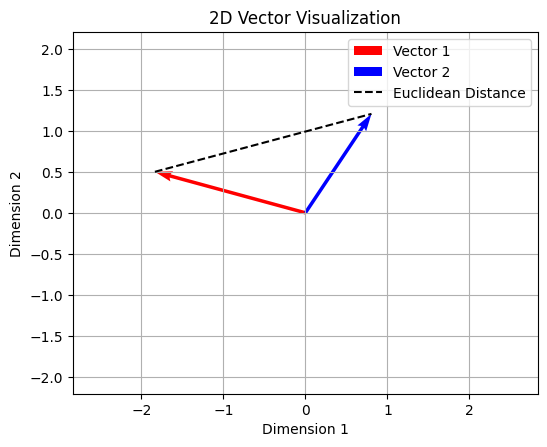

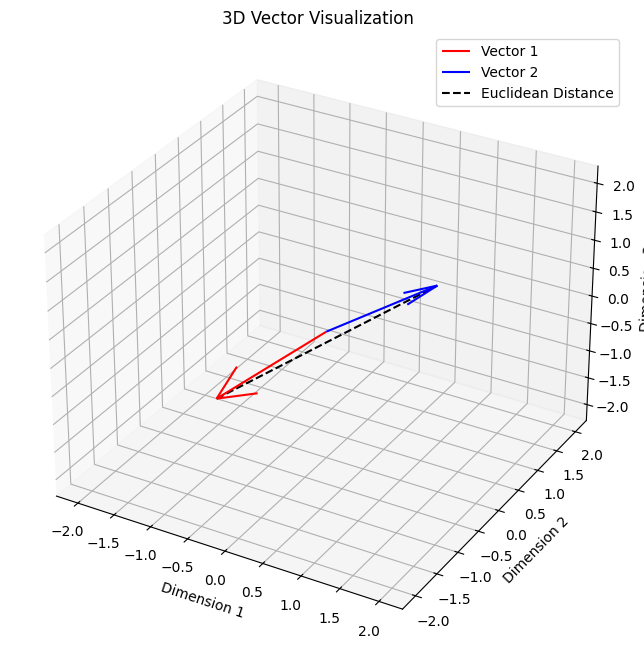

In [104]:
#plot distances between raining and umbrella
plot_distances(vector_representations, 'raining', 'umbrella')

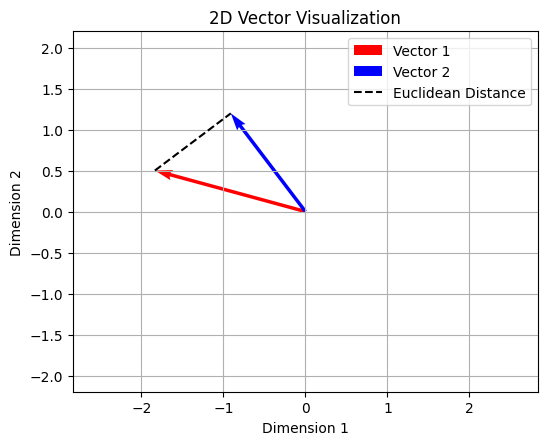

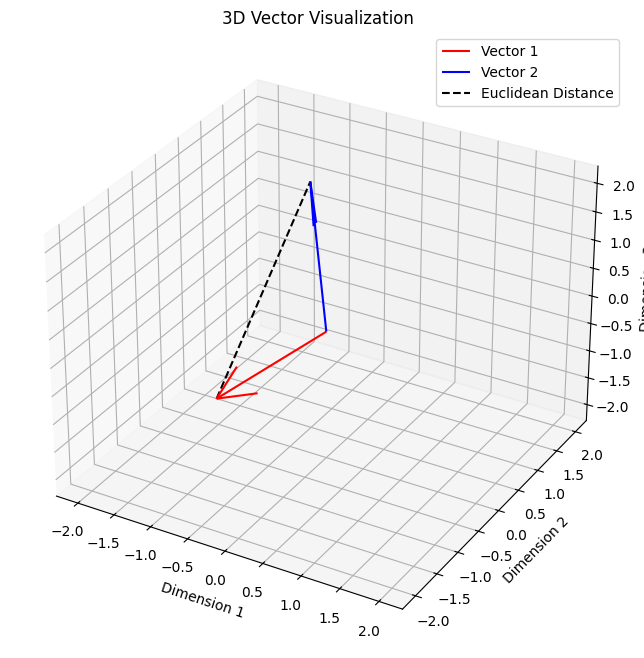

In [105]:
plot_distances(vector_representations, 'raining', 'shelter')

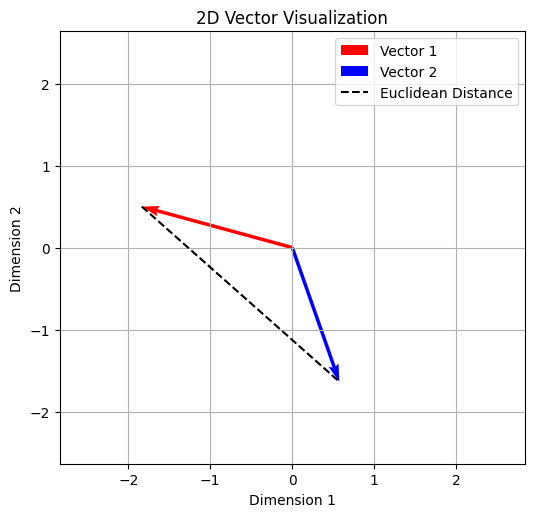

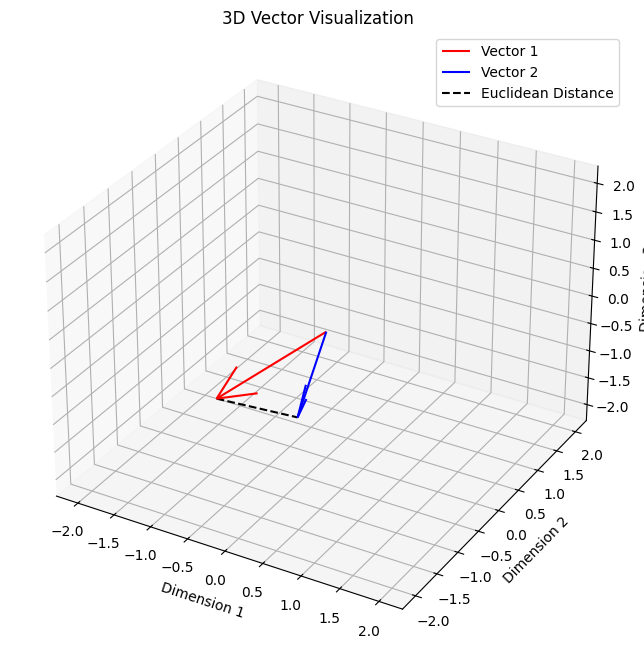

In [106]:
plot_distances(vector_representations, 'raining', 'politics')

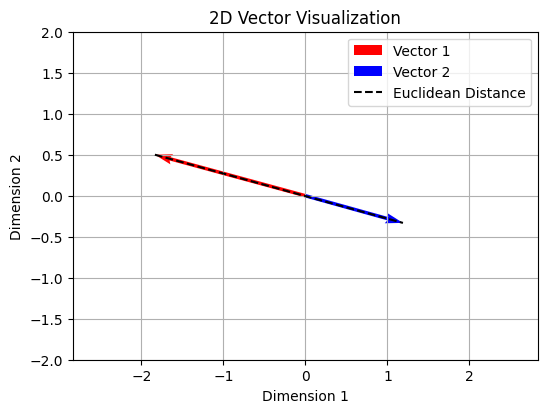

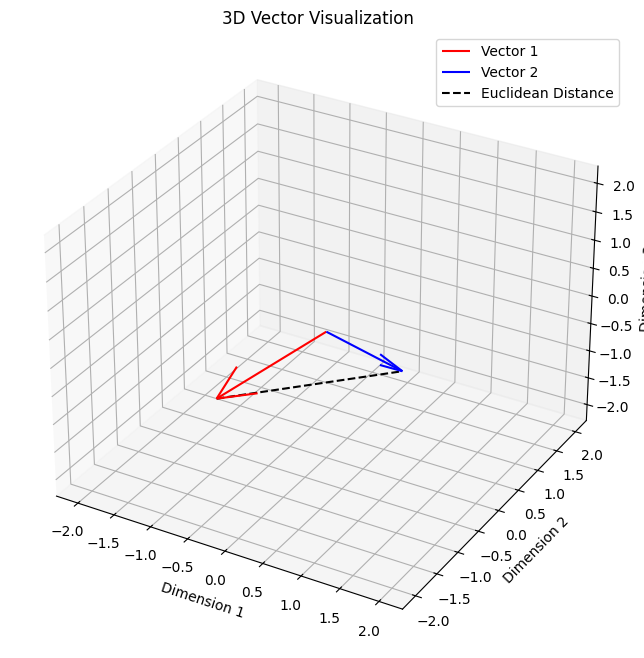

In [107]:
plot_distances(vector_representations, 'raining', 'banana')

/tmp/ipython-input-1371387448.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


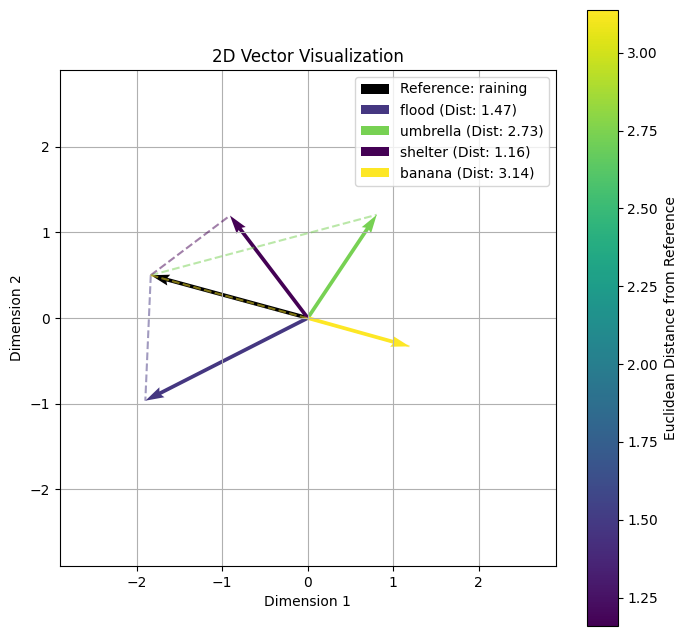

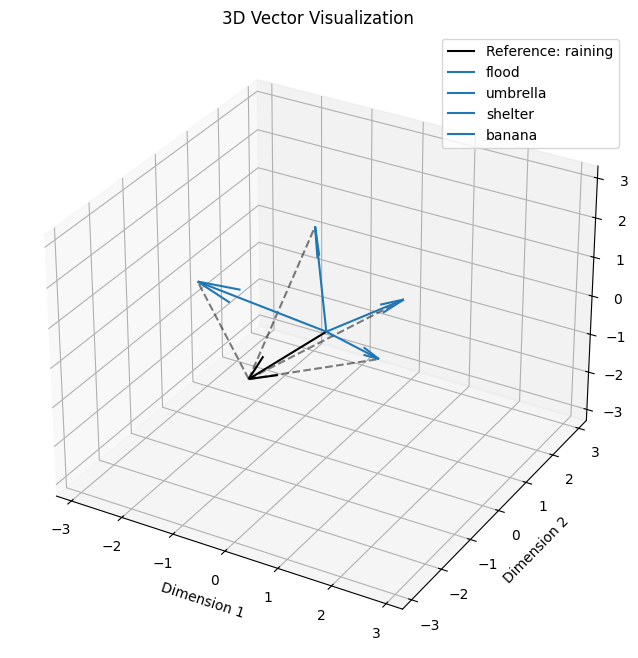

In [108]:
# Create dictionaries of 2D and 3D vectors for the words
words_to_plot = ['raining', 'flood', 'umbrella', 'shelter', 'banana']
vectors_2d_to_plot = {word: vector_representations[word]['2D'] for word in words_to_plot}
vectors_3d_to_plot = {word: vector_representations[word]['3D'] for word in words_to_plot}

# Plot the vectors
plot_2d_vectors_with_distances(vectors_2d_to_plot, 'raining', '2D Vector Visualization')
plot_3d_vectors_with_distances(vectors_3d_to_plot, 'raining', '3D Vector Visualization')